In [1]:
import numpy as np
import pygimli as pg
#import pybert as pb
from pygimli.physics import ert
#from pybert.importer.exportData import exportRes2dInv
from pygimli.physics.ert.importData import importRes2dInv
import matplotlib.pyplot as plt
import pygimli.meshtools as mt
from pygimli.frameworks import PriorModelling, JointModelling
from scipy.interpolate import interp1d
from scipy.interpolate import PPoly
import pandas as pd
import pickle
from pygimli.viewer.mpl import draw1DColumn, drawSensors
import statsmodels.api as sm
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.patches import Rectangle
from matplotlib.patches import Patch
from matplotlib.ticker import MultipleLocator
import matplotlib.image as mpimg
import matplotlib.cm as cm
import pyvista
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize
import datetime
import re
import os
from scipy.interpolate import splrep, splev
import matplotlib.patheffects as path_effects
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import Normalize

In [2]:
dir = "//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/inversions/saved/"

In [12]:
mesh_f38_diag1_1 = pg.load(dir+'f38_diag1_1/ERTManager/resistivity-pd.bms')
res_f38_diag1_1 = pg.load(dir+'f38_diag1_1/ERTManager/resistivity.vector')
cov_f38_diag1_1 = pg.load(dir+'f38_diag1_1/ERTManager/resistivity-cov.vector')

mesh_f38_diag1_2 = pg.load(dir+'f38_diag1_2/ERTManager/resistivity-pd.bms')
res_f38_diag1_2 = pg.load(dir+'f38_diag1_2/ERTManager/resistivity.vector')
cov_f38_diag1_2 = pg.load(dir+'f38_diag1_2/ERTManager/resistivity-cov.vector')

mesh_e02_h1_1 = pg.load(dir+'e02_h1_1/ERTManager/resistivity-pd.bms')
res_e02_h1_1 = pg.load(dir+'e02_h1_1/ERTManager/resistivity.vector')
cov_e02_h1_1 = pg.load(dir+'e02_h1_1/ERTManager/resistivity-cov.vector')

mesh_a12_diag1_1 = pg.load(dir+'a12_diag1_1/ERTManager/resistivity-pd.bms')
res_a12_diag1_1 = pg.load(dir+'a12_diag1_1/ERTManager/resistivity.vector')
cov_a12_diag1_1 = pg.load(dir+'a12_diag1_1/ERTManager/resistivity-cov.vector')

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_23816\2405967574.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks0])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_23816\2405967574.py:39: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks1])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_23816\2405967574.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[2].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks2])


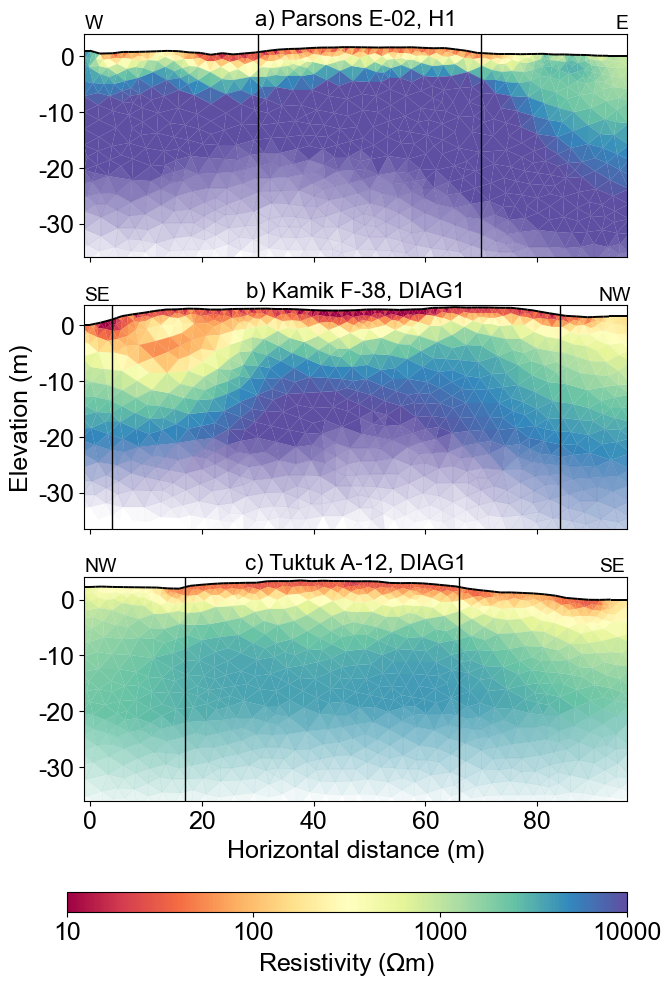

In [11]:

cMin = 10
cMax = 10000

plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({"text.usetex": False})
plt.rcParams['font.size'] = 18



fig, ax = plt.subplots(3, 1, figsize=(7, 10), sharex=True)


pg.show(mesh_e02_h1_1, res_e02_h1_1,logScale=True, cMap="Spectral", colorBar = False, ax=ax[0], coverage=cov_e02_h1_1, cMin=cMin, cMax= cMax, sharex=True, axisLabels=False)
pg.show(mesh_f38_diag1_1, res_f38_diag1_1,logScale=True, cMap="Spectral", colorBar = False, ax=ax[1], coverage=cov_f38_diag1_1, cMin=cMin, cMax= cMax, sharex=True,  axisLabels=False)
pg.show(mesh_a12_diag1_1, res_a12_diag1_1,logScale=True, cMap="Spectral", colorBar = False, ax=ax[2], coverage=cov_a12_diag1_1, cMin=cMin, cMax= cMax, sharex=True,  axisLabels=False)


cax = fig.add_axes([0.1, 0.0005, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, logScale=True, cMin=cMin, cMax= cMax, cMap="Spectral")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity ($\Omega$m)')


#ax[1].set_ylim(-18, 19)
#ax[2].set_ylim(0, 40)

current_ticks0 = ax[0].get_yticks()
relative_ticks0 = current_ticks0-36
ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks0])
desired_ticks = np.arange(0, -41, -10)  # [0, -10, -20, -30, -40]
ax[0].set_yticks(desired_ticks + 36)
ax[0].set_yticklabels([f"{tick}" for tick in desired_ticks])

current_ticks1 = ax[1].get_yticks()
relative_ticks1 = current_ticks1-17.5
ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks1])
ax[1].set_yticks(desired_ticks + 17.5)
ax[1].set_yticklabels([f"{tick}" for tick in desired_ticks])

current_ticks2 = ax[2].get_yticks()
relative_ticks2 = current_ticks2-7
ax[2].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks2])
ax[2].set_yticks(desired_ticks + 7)
ax[2].set_yticklabels([f"{tick}" for tick in desired_ticks])

ax[0].set_xlim(-1, 96)
ax[1].set_xlim(-1, 96)
ax[2].set_xlim(-1, 96)

ax[0].set_ylim(0, 40)
ax[1].set_ylim(-19,21)
ax[2].set_ylim(-29,11)

ax[0].set_ylabel("")
ax[1].set_ylabel("Elevation (m)")
ax[2].set_ylabel("")

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[2].set_xlabel("Horizontal distance (m)")

ax[0].axvline(30, linewidth=1, color='black')
ax[0].axvline(70, linewidth=1, color='black')

ax[1].axvline(4, linewidth=1, color='black', label='sump edge')
ax[1].axvline(84, linewidth=1, color='black')

ax[2].axvline(66, linewidth=1, color='black', label='sump edge')
ax[2].axvline(17, linewidth=1, color='black', label='sump edge')


ax[0].text(-1, 41, 'W', fontsize=14)
ax[0].text(94, 41, 'E', fontsize=14)
ax[1].text(-1, 22, 'SE', fontsize=14)
ax[1].text(91, 22, 'NW', fontsize=14)
ax[2].text(-1, 12, 'NW', fontsize=14)
ax[2].text(91, 12, 'SE', fontsize=14)

ax[0].set_title('a) Parsons E-02, H1', fontsize=16)
ax[1].set_title('b) Kamik F-38, DIAG1', fontsize=16)
ax[2].set_title('c) Tuktuk A-12, DIAG1', fontsize=16)


plt.savefig("//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/figures/over_sump.png", bbox_inches='tight')

C:\Users\mealiy001\AppData\Local\Temp\ipykernel_23816\2918222956.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks1])
C:\Users\mealiy001\AppData\Local\Temp\ipykernel_23816\2918222956.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks1])


Text(0.5, 138.16450811445551, 'Horizontal distance (m)')

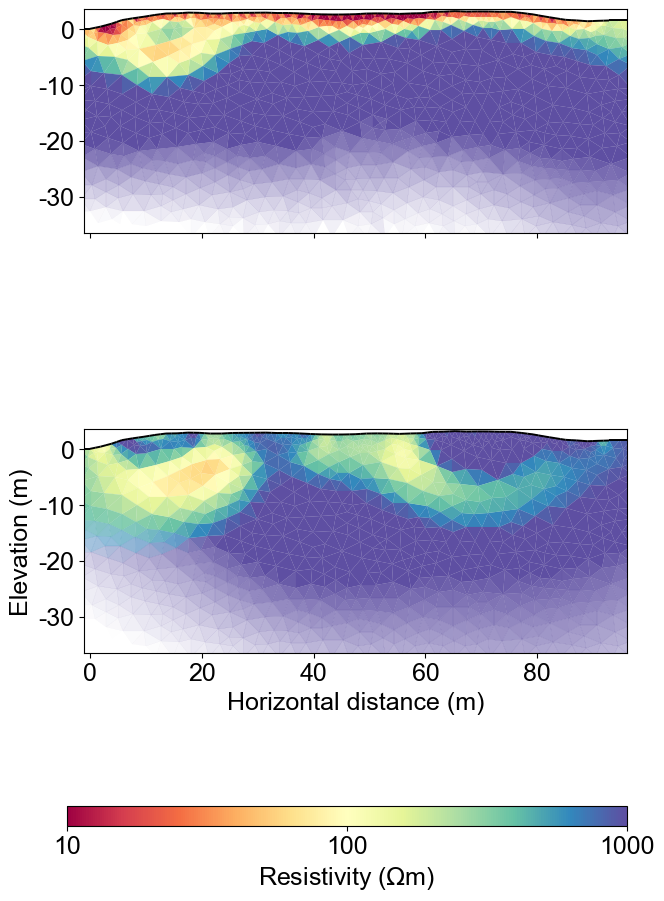

In [17]:

cMin = 10
cMax = 1000

plt.rcParams['font.family'] = 'Arial'
plt.rcParams.update({"text.usetex": False})
plt.rcParams['font.size'] = 18



fig, ax = plt.subplots(2, 1, figsize=(7, 10), sharex=True)



pg.show(mesh_f38_diag1_1, res_f38_diag1_1,logScale=True, cMap="Spectral", colorBar = False, ax=ax[0], coverage=cov_f38_diag1_1, cMin=cMin, cMax= cMax, sharex=True,  axisLabels=False)
pg.show(mesh_f38_diag1_2, res_f38_diag1_2,logScale=True, cMap="Spectral", colorBar = False, ax=ax[1], coverage=cov_f38_diag1_2, cMin=cMin, cMax= cMax, sharex=True,  axisLabels=False)


cax = fig.add_axes([0.1, 0.0005, 0.8, 0.02])  

colorbar = pg.viewer.mpl.createColorBarOnly(ax=cax, logScale=True, cMin=cMin, cMax= cMax, cMap="Spectral")

cax.xaxis.set_major_locator(LogLocator(base=10.0))
cax.xaxis.set_major_formatter(LogFormatter(labelOnlyBase=False))
cax.set_xlabel('Resistivity ($\Omega$m)')


#ax[1].set_ylim(-18, 19)
#ax[2].set_ylim(0, 40)
desired_ticks = np.arange(0, -41, -10)  # [0, -10, -20, -30, -40]


current_ticks0 = ax[0].get_yticks()
relative_ticks0 = current_ticks0-17.5
ax[0].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks1])
ax[0].set_yticks(desired_ticks + 17.5)
ax[0].set_yticklabels([f"{tick}" for tick in desired_ticks])

current_ticks1 = ax[1].get_yticks()
relative_ticks1 = current_ticks1-17.5
ax[1].set_yticklabels([f"{tick:.1f}" for tick in relative_ticks1])
ax[1].set_yticks(desired_ticks + 17.5)
ax[1].set_yticklabels([f"{tick}" for tick in desired_ticks])



ax[0].set_xlim(-1, 96)
ax[1].set_xlim(-1, 96)


ax[0].set_ylim(-19,21)
ax[1].set_ylim(-19,21)


ax[0].set_ylabel("")
ax[1].set_ylabel("Elevation (m)")


ax[0].set_xlabel("")
ax[1].set_xlabel("Horizontal distance (m)")



#ax[0].text(-1, 41, 'W', fontsize=14)
#ax[0].text(94, 41, 'E', fontsize=14)
#ax[1].text(-1, 22, 'SE', fontsize=14)
#ax[1].text(91, 22, 'NW', fontsize=14)


#ax[0].set_title('a) Parsons E-02, H1', fontsize=16)
#ax[1].set_title('b) Kamik F-38, DIAG1', fontsize=16)



#plt.savefig("//smb.isipd.dmawi.de/projects/p_thinice/06_data/ERT_data/figures/over_sump.png", bbox_inches='tight')